In [10]:
%load_ext autoreload
%autoreload 2

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 100)

In [81]:
data = pd.read_csv('BlackLivesMatter_revisions.csv')
data

,date,text
0,2015-03-08,Black Lives Matter is a U.S.-based international movement co-founded by three black women activi...
1,2015-09-08,\nBlack Lives Matter is an activist movement in the United States that began in the wake of the ...
2,2016-03-09,"\nBlack Lives Matter (BLM) is an international activist movement, originating in the African-Ame..."
3,2016-09-10,"\nBlack Lives Matter (BLM) is an international[1] activist movement, originating in the African-..."
4,2017-03-12,"\nBlack Lives Matter (BLM) is an international activist movement, originating in the African-Ame..."
5,2017-09-13,"\nBlack Lives Matter (BLM) is an international activist movement, originating in the African-Ame..."
6,2018-03-18,"\nBlack Lives Matter (BLM) is an international activist movement, originating in the African-Ame..."
7,2018-09-19,"\nBlack Lives Matter (BLM) is an international activist movement, originating in the African-Ame..."
8,2019-04-11,"\nBlack Lives Matter (BLM) is an international activist movement, originating in the African-Ame..."
9,2019-10-18,"\nBlack Lives Matter (BLM) is an international activist movement, originating in the African-Ame..."


In [29]:
from text_preprocess import sentence_preprocess

date_before, text_before = data.iloc[0].values
date_after, text_after = data.iloc[1].values
sentences, clean_sentences = sentence_preprocess(text_before)

Example of simple preprocess:

In [30]:
sentences[0]

'Black Lives Matter is a U.S.-based international movement co-founded by three black women activist/organizers: Alicia Garza, Patrisse Cullors, and Opal Tometi.'

In [31]:
clean_sentences[0]

'black lives matter u based international movement co founded three black women activist organizers alicia garza patrisse cullors opal tometi'

## Different between before and after:

An example for a sentence-wise difference dataframe (a change density between *before* and *after* for each sentence)

In [82]:
from Diff import diff_score, create_diff_df
df = create_diff_df(text_before, text_after)
df

,text_before,text_after,change_density
0,Black Lives Matter is a U.S.-based international movement co-founded by three black women activi...,None,-1.0
1,"[1]\nWhen they created Black Lives Matter and as of March 2015, Garza was Special Projects Direc...",None,-1.0
2,[2]\n\nThe #BlackLivesMatter movement began as a hashtag after George Zimmerman's acquittal for ...,None,-1.0
3,"Currently, there are 23 Black Lives Matter chapters in the U.S., Canada, and Ghana.","Currently, there are 23 Black Lives Matter chapters in the U.S., Canada, and Ghana.",0.0
4,"[3] Black Lives Matter is ""a unique contribution that goes beyond extrajudicial killings of Blac...","[8] The organization states that Black Lives Matter is ""a unique contribution that goes beyond e...",0.245283
...,...,...,...
63,None,"Numerous media organizations have referred to it as ""a new civil rights movement.",1.0
64,None,Several unarmed African Americans who died at the hands of law enforcement have had their deaths...,1.0
65,None,"The group received fresh impetus from the 2014 deaths of two unarmed African Americans, teenager...",1.0
66,None,The Black Lives Matter movement campaigns against what it calls police brutality in the United S...,1.0


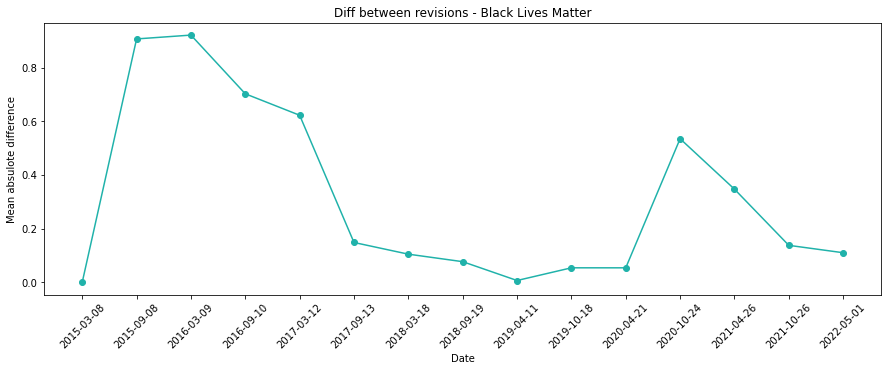

In [86]:
text_diffs = [0]
n = data.shape[0]
for i in range(n - 1):
    text_diffs.append(diff_score(data.iloc[i]['text'], data.iloc[i + 1]['text']))

plt.figure(figsize=(15,5))
plt.plot(range(n), text_diffs, c='lightseagreen')
plt.scatter(range(n), text_diffs, c='lightseagreen')
plt.xticks(ticks=range(n), labels=data['date'], rotation=45)
plt.xlabel('Date')
plt.ylabel('Mean absulote difference')
plt.title('Diff between revisions - Black Lives Matter')
plt.show()

The value at each point (i) is the level of difference between this date (i) and the next date (i+1)

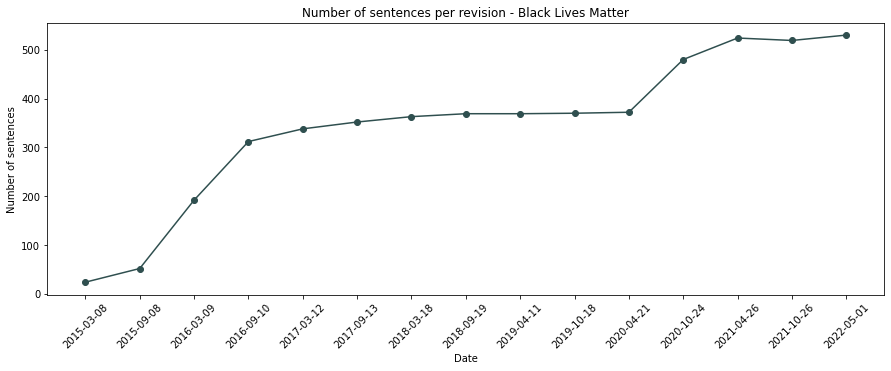

In [90]:
from nltk.tokenize import sent_tokenize

text_lengths = data['text'].apply(lambda t: len(sent_tokenize(t))).values
plt.figure(figsize=(15,5))
plt.plot(range(n), text_lengths, c='darkslategrey')
plt.scatter(range(n), text_lengths, c='darkslategrey')
plt.xticks(ticks=range(n), labels=data['date'], rotation=45)
plt.xlabel('Date')
plt.ylabel('Number of sentences')
plt.title('Number of sentences per revision - Black Lives Matter')
plt.show()

For a 1-step process, based on these plots, we will take 3 *before*-*after* pairs:
* Large diff, Short text (**LS**) $~~~~~~~~~~~~~~~~~~~$ (2015-03-08 -> 2015-09-08)
* Large diff, Long text (**LL**) $~~~~~~~~~~~~~~~~~~~~$ (2020-04-21 -> 2020-10-24)
* Small diff, Medium-length text (**SM**) $~~~$ (2018-03-18 -> 2018-09-19)

In [ ]:
events = {'2014-08-10': 'Ferguson unrest', 
          '2016-11-08': '2016 United States presidential election'
          '2020-05-25': 'Murder of George Floyd', 
